In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [ ]:
# linear data
X = np.array([1, 1, 2, 2, 4, 5, 5, 6])
Y = np.array([1, -1, 1, -1, 0, 1, -1, 0])

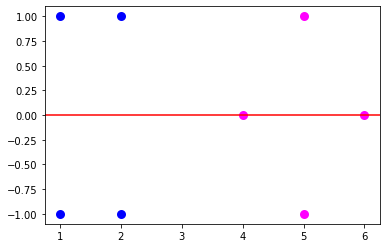

In [ ]:
col =[]
for i in range(0, len(X)):
    if i < 4:
        col.append('blue')  
    else:
        col.append('magenta') 
  
for i in range(len(X)):
    # plotting the corresponding x with y and respective color
    plt.scatter(X[i], Y[i], c = col[i], linewidth = 3)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [ ]:
# shaping data for training the model
training_X = np.vstack((X, Y)).T
training_y = [0, 0, 0, 0, 1, 1, 1, 1]

In [ ]:
# define the model
clf = svm.SVC(kernel='linear', C=1.0)

In [ ]:
# train the model
clf.fit(training_X, training_y)

SVC(kernel='linear')

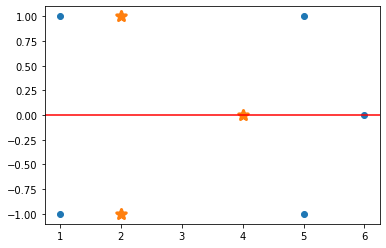

In [ ]:
plt.scatter(training_X[:, 0], training_X[:, 1])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=3, marker='*')
plt.axhline(y=0, color='r', linestyle='-')
w = clf.coef_[0]
# get the y-offset for the linear equation
a = -w[0] / w[1]
# make the x-axis space for the data points
XX = np.linspace(0, 6)
# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]
#plt.plot(XX, yy,'k-')
plt.show()

In [ ]:
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 9.99680000e-01 -1.66533454e-16]]
b =  [-2.99914667]
Indices of support vectors =  [2 3 4]
Support vectors =  [[ 2.  1.]
 [ 2. -1.]
 [ 4.  0.]]
Number of support vectors for each class =  [2 1]
Coefficients of the support vector in the decision function =  [[0.24992 0.24992 0.49984]]


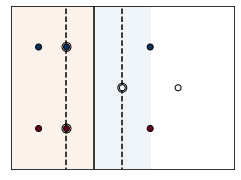

In [ ]:
from matplotlib import cm

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
)
plt.scatter(
        training_X[:, 0], training_X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
)

plt.axis("tight")
x_min = 0
x_max = 8
y_min = -2
y_max = 2

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
#fignum = fignum + 1

plt.show()